# Sales Data Analysis

In [55]:
import pandas as pd 

sales_table = pd.read_csv('input/SalesTable.csv')

sales_table.head()

,SaleID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesRepID,RegionID
0,S00001,2023-01-31,C004,P004,5,56.81,0.10,SR02,R03
1,S00002,30.12.2023,C001,P005,7,98.78,0.15,SR01,R01
2,S00003,2022-05-10,C001,P006,3,97.12,0.15,SR01,R01
3,S00004,2023-07-18,C003,P002,9,47.33,0.05,SR01,R01
4,S00005,2023-02-04,C004,P001,4,71.67,0.15,SR02,R03


In [56]:
# Check for invalid dates in the date column
invalid_dates = sales_table[pd.to_datetime(sales_table['Date'], errors='coerce').isna()]
print(invalid_dates)

   SaleID        Date CustomerID ProductID  Quantity  UnitPrice  Discount  \
1  S00002  30.12.2023       C001      P005         7      98.78      0.15   

  SalesRepID RegionID  
1       SR01      R01  


In [ ]:
# Fix the invalid dates

# Chech if date is invalid or not
is_wrong_date_format = pd.to_datetime(sales_table['Date'], errors='coerce').isna()

# Replace the invalid dates
sales_table.loc[is_wrong_date_format, 'Date'] = pd.to_datetime(
    sales_table.loc[is_wrong_date_format, 'Date'], 
    format='%d.%m.%Y', 
    errors='coerce'
).dt.strftime('%Y-%m-%d')

sales_table.head()


,SaleID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesRepID,RegionID
0,S00001,2023-01-31,C004,P004,5,56.81,0.10,SR02,R03
1,S00002,2023-12-30,C001,P005,7,98.78,0.15,SR01,R01
2,S00003,2022-05-10,C001,P006,3,97.12,0.15,SR01,R01
3,S00004,2023-07-18,C003,P002,9,47.33,0.05,SR01,R01
4,S00005,2023-02-04,C004,P001,4,71.67,0.15,SR02,R03


In [ ]:
# Fix the date for the error row manually
sales_table.loc[sales_table['SaleID'] == 'S00002', 'Date'] = '2023-12-30'

sales_table.head()


,SaleID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesRepID,RegionID
0,S00001,2023-01-31,C004,P004,5,56.81,0.10,SR02,R03
1,S00002,2023-12-30,C001,P005,7,98.78,0.15,SR01,R01
2,S00003,2022-05-10,C001,P006,3,97.12,0.15,SR01,R01
3,S00004,2023-07-18,C003,P002,9,47.33,0.05,SR01,R01
4,S00005,2023-02-04,C004,P001,4,71.67,0.15,SR02,R03


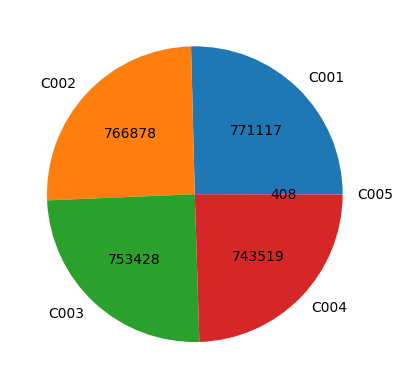

In [51]:
# Create a pie chart by customer sales sum 
# Add sales sum column
sales_table['SaleSum'] = sales_table['Quantity'] * sales_table['UnitPrice'] * (1-sales_table['Discount'])

import matplotlib.pyplot as plt

sales_by_customers = sales_table.groupby('CustomerID').sum('SaleSum')

sales_by_customers.plot(y = 'SaleSum', kind='pie', legend=False, ylabel=''
                        , autopct=lambda pct: '{:.0f}'.format(pct*sales_by_customers['SaleSum'].sum()/100)
                        )
plt.show()


In [ ]:
# Add customer table 
customer_table = pd.read_csv('input/CustomerTable.csv')
customer_table.head()

,CustomerID,CustomerName,Industry,Country,RegionID
0,C001,Alice Ltd,Retail,USA,R01
1,C002,Bob Inc,Wholesale,Canada,R02
2,C003,Charlie LLC,E-commerce,USA,R01
3,C004,Delta Group,Retail,UK,R03


In [ ]:
# Join sales table and customer table
merged_data = pd.merge(sales_table, customer_table, on='CustomerID', how='left')
merged_data.head()

,SaleID,Date,CustomerID,ProductID,Quantity,UnitPrice,Discount,SalesRepID,RegionID_x,SaleSum,CustomerName,Industry,Country,RegionID_y
0,S00001,2023-01-31,C004,P004,5,56.81,0.10,SR02,R03,255.6450,Delta Group,Retail,UK,R03
1,S00002,2023-12-30,C001,P005,7,98.78,0.15,SR01,R01,587.7410,Alice Ltd,Retail,USA,R01
2,S00003,2022-05-10,C001,P006,3,97.12,0.15,SR01,R01,247.6560,Alice Ltd,Retail,USA,R01
3,S00004,2023-07-18,C003,P002,9,47.33,0.05,SR01,R01,404.6715,Charlie LLC,E-commerce,USA,R01
4,S00005,2023-02-04,C004,P001,4,71.67,0.15,SR02,R03,243.6780,Delta Group,Retail,UK,R03


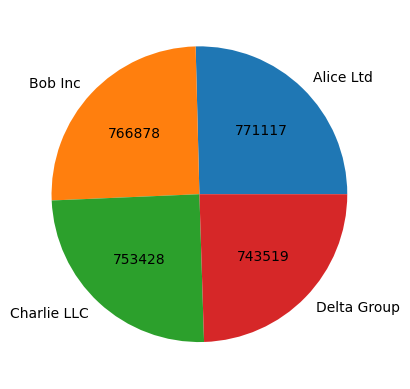

In [58]:
# Create pie chart with customer names 

sales_by_customer_names = merged_data.groupby('CustomerName').sum('SaleSum')

sales_by_customer_names.plot(y = 'SaleSum', kind='pie', legend=False, ylabel=''
                        , autopct=lambda pct: '{:.0f}'.format(pct*sales_by_customer_names['SaleSum'].sum()/100)
                        )
plt.show()